In [1]:
import sqlite3
import pandas

sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)

salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll,sum(salary)/count(salary) as payroll_mean FROM Salaries GROUP BY teamID,yearID"
team_salaries = pandas.read_sql(salary_query, conn)
team_query = "SELECT teamID, yearID, W as wins, G as games, CAST(W*100 AS float)/G as win_percent FROM Teams GROUP BY teamID,yearID"
team_win = pandas.read_sql(team_query, conn)
team_win.head()
result = pandas.merge(team_salaries, team_win, how='inner', on=['teamID','yearID'])
result

,teamID,yearID,total_payroll,payroll_mean,wins,games,win_percent
0,ATL,1985,14807000.0,6.730455e+05,66,162,40.740741
1,BAL,1985,11560712.0,5.254869e+05,83,161,51.552795
2,BOS,1985,10897560.0,4.359024e+05,81,163,49.693252
3,CAL,1985,14427894.0,5.152819e+05,90,162,55.555556
4,CHA,1985,9846178.0,4.688656e+05,85,163,52.147239
5,CHN,1985,12702917.0,5.774053e+05,77,162,47.530864
6,CIN,1985,8359917.0,3.799962e+05,89,162,54.938272
7,CLE,1985,6551666.0,3.275833e+05,60,162,37.037037
8,DET,1985,10348143.0,5.174072e+05,84,161,52.173913
9,HOU,1985,9993051.0,4.996525e+05,83,162,51.234568


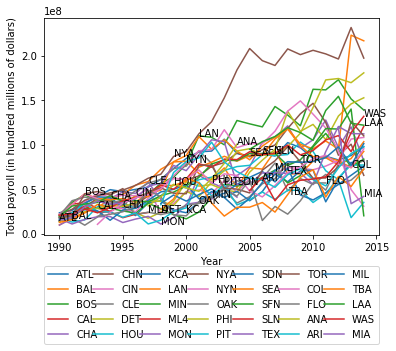

In [3]:
import numpy as np
import matplotlib.pyplot as plt
##### payroll vs time for each team
plot_result = result[result['yearID']>=1990]
plot_result = plot_result[plot_result['yearID']<=2014]
plot_result = plot_result[['teamID','yearID','total_payroll']]
teams = plot_result['teamID'].drop_duplicates()
i = 0
for t in teams:
    team_table = plot_result[plot_result['teamID']==t]
    year_list = list(team_table['yearID'])
    payroll_list = list(team_table['total_payroll'])
    plt.plot(year_list,payroll_list,label=t)
    if i >= len(year_list):
        i = len(year_list)-1
    year = year_list[i]
    num = payroll_list[i]
    plt.annotate(t,xy=(year,num))
    plt.legend(bbox_to_anchor=(0., -0.5, 1., 0), loc=3,
           ncol=7, mode="expand", borderaxespad=0.)
    i += 1
plt.xlabel("Year")
plt.ylabel("Total payroll (in hundred millions of dollars)")
plt.show()

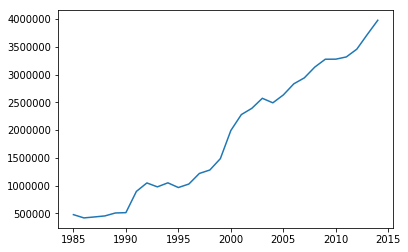

In [4]:
##################################
# Statement: The payroll distribution is increasing by time for all teams
# The gaps between payrolls of each team is also increasing by time
##################################

######salary mean vs time
query = "SELECT yearID, sum(salary)/count(salary) as salary_mean FROM Salaries GROUP BY yearID ORDER BY yearID asc"
mean_table = pandas.read_sql(query,conn)
plt.plot(mean_table['yearID'],mean_table['salary_mean'])

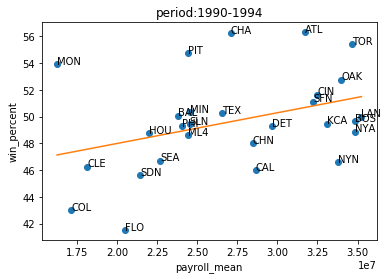

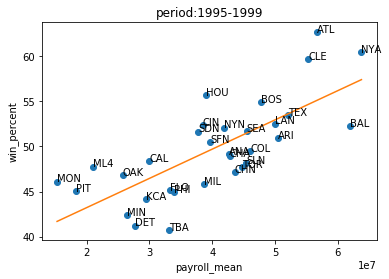

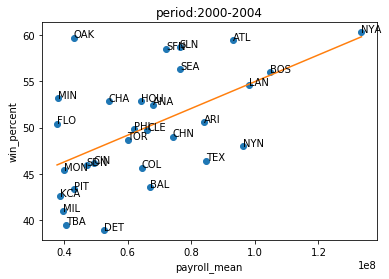

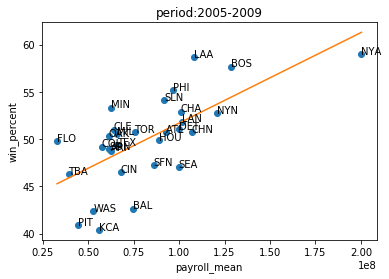

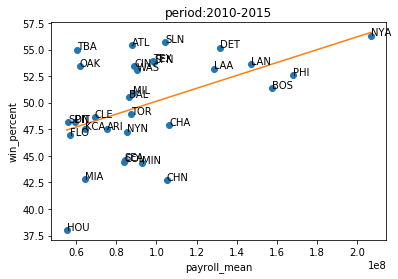

In [5]:
###############################
### Problem 4
# discretize year into five time periods
# show mean winning precentage (y) vs mean payroll(x) for the five time periods
# add regression line in each scatter plot to ease interpretation
###############################
### need team, year, total payroll, wins and games ###
query1 = "SELECT  teamID,yearID, sum(salary) as total_payroll FROM Salaries WHERE yearID >= 1990 GROUP BY teamID,yearID"
query2 = "SELECT  teamID,yearID, W,G FROM Teams WHERE yearID >= 1990 GROUP BY teamID,yearID"
query1 = pandas.read_sql(query1, conn)
query2 = pandas.read_sql(query2,conn)
group_table = pandas.merge(query1, query2, how='inner', on=['yearID','teamID'])
### discretize years ###
cuts = [1990,1995,2000,2005,2010,2015]
group_names = ['1990-1994','1995-1999','2000-2004','2005-2009','2010-2015']
categories = pandas.cut(group_table['yearID'],cuts,labels=group_names)
group_table['categories'] = pandas.cut(group_table['yearID'], cuts,right=False,labels=group_names)
### group table: teamID,yearID,total_payroll, W,G,categories ###

### for each period, calculate win_percent and payroll_mean for each team ###
for period in group_names:
    ### win_table: teamID win_percent ###
    win_table = group_table.drop('yearID',axis = 1).drop('total_payroll',1).groupby(['categories']).get_group(period).groupby(['teamID']).sum().reset_index()
    win_table['win_percent'] = 100 * win_table['W']/win_table['G']
    win_table = win_table.drop('W',1).drop('G',1)
    ### temp group: teamID,total_payroll categories ###
    temp_group_table = group_table.drop('yearID',1).drop('W',1).drop('G',1)
    mean_table = temp_group_table.groupby(['categories']).get_group(period).groupby(['teamID']).mean().reset_index()
    mean_table.columns = ['teamID','payroll_mean']
    ### final_table: teamID, win_percent, payroll_mean ###
    final_table = win_table.merge(mean_table)
    
    x = final_table['payroll_mean'].values
    y = final_table['win_percent'].values
    regression = np.polyfit(x,y,deg=1)
    line = np.poly1d(regression)
    line_x = np.linspace(x.min(),x.max(),100)
    line_y = line(line_x)
    plt.plot(x,y,'o',line_x,line_y)
    for i,team in enumerate(final_table['teamID']):
        plt.annotate(team,xy=(x[i],y[i]))
    plt.title("period:"+ period)
    plt.xlabel("payroll_mean")
    plt.ylabel("win_percent")
    plt.show()

The payrolls are increasing accross the period (from 10^7 to 10^8)
The win_percent is higher when the payroll is larger according to the interpolation line.
The teams above the interpolation line have a higher efficiency on using money in that period
Team ATL did a good job on using money efficiently. They used less money and got a high win_percent at most period
OAK spent less money and got a high win_percent at most period, so OAK's speding efficiency is high at most time.

In [6]:
### Create a new variable in dataset that standardizes payroll conditioned on year.
mean_payroll = result[['yearID','total_payroll']].groupby('yearID').mean()
mean_payroll.columns = ['mean_payroll']
std = result[['yearID','total_payroll']].groupby('yearID').std()
std.columns = ['std']
new_table = group_table[['yearID','teamID','total_payroll','categories']].copy()
for i,row in new_table.iterrows():
    new_table.at[i,'std_payroll'] = (row['total_payroll'] - mean_payroll['mean_payroll'][row['yearID']])/std['std'][row['yearID']]
new_table

,yearID,teamID,total_payroll,categories,std_payroll
0,1990,ATL,14555501.0,1990-1994,-0.667275
1,1990,BAL,9680084.0,1990-1994,-1.959861
2,1990,BOS,20558333.0,1990-1994,0.924213
3,1990,CAL,21720000.0,1990-1994,1.232198
4,1990,CHA,9491500.0,1990-1994,-2.009859
5,1990,CHN,13624000.0,1990-1994,-0.914238
6,1990,CIN,14370000.0,1990-1994,-0.716456
7,1990,CLE,14487000.0,1990-1994,-0.685437
8,1990,DET,17593238.0,1990-1994,0.138098
9,1990,HOU,18330000.0,1990-1994,0.333431


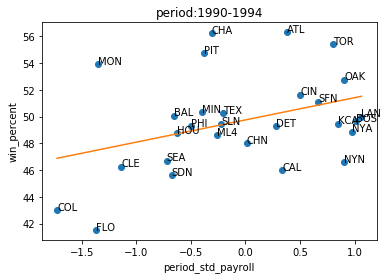

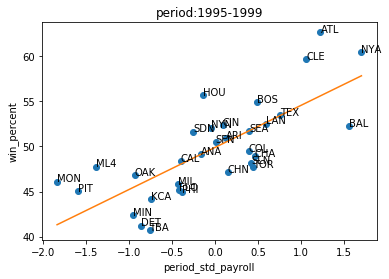

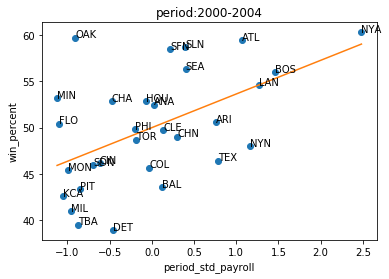

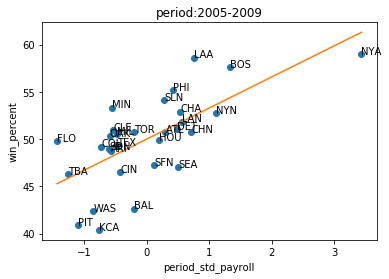

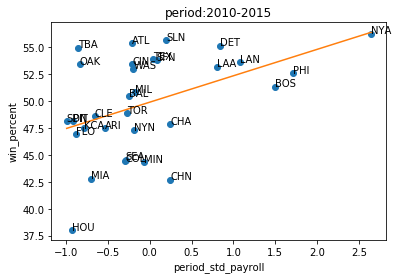

In [7]:
### Repeat the same plots as Problem 4, but use this new standardized payroll variable.
for period in group_names:
    std_table = new_table.drop('total_payroll',1).drop('yearID',1).groupby('categories').get_group(period).groupby('teamID').mean().reset_index()
    std_table.columns = ['teamID','period_std_payroll']
    win_table = group_table.drop('yearID',axis = 1).drop('total_payroll',1).groupby(['categories']).get_group(period).groupby(['teamID']).sum().reset_index()
    win_table['win_percent'] = 100 * win_table['W']/win_table['G']
    win_table = win_table.drop('W',1).drop('G',1)
    final_table = win_table.merge(std_table)
    
    x = final_table['period_std_payroll'].values
    y = final_table['win_percent'].values
    regression = np.polyfit(x,y,deg=1)
    line = np.poly1d(regression)
    line_x = np.linspace(x.min(),x.max(),100)
    line_y = line(line_x)
    plt.plot(x,y,'o',line_x,line_y)
    for i,team in enumerate(final_table['teamID']):
        plt.annotate(team,xy=(x[i],y[i]))
    plt.title("period:"+ period)
    plt.xlabel("period_std_payroll")
    plt.ylabel("win_percent")
    plt.show()

The shape of the plots are almost the same as the plots in Problem 4. 
By doing standarization, we can see which data is near the mean of away from the mean

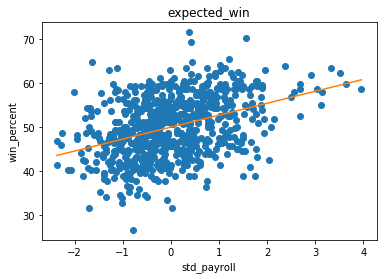

,yearID,teamID,std_payroll,win_percent,expected_win
0,1990,ATL,-0.667275,40.123457,48.331811
1,1990,BAL,-1.959861,47.204969,45.100348
2,1990,BOS,0.924213,54.320988,52.310533
3,1990,CAL,1.232198,49.382716,53.080495
4,1990,CHA,-2.009859,58.024691,44.975353
5,1990,CHN,-0.914238,47.530864,47.714405
6,1990,CIN,-0.716456,56.172840,48.208860
7,1990,CLE,-0.685437,47.530864,48.286408
8,1990,DET,0.138098,48.765432,50.345246
9,1990,HOU,0.333431,46.296296,50.833577


In [8]:
temp_table = result[['yearID','teamID','win_percent']]
temp_table = temp_table[temp_table['yearID'] >= 1990].reset_index().drop('index',1)
expected_win = temp_table[['teamID','yearID','win_percent']]
expected_win = new_table.merge(expected_win, how = 'inner',on = ['teamID','yearID']).drop('total_payroll',1).drop('categories',1)

x = expected_win['std_payroll'].values
y = expected_win['win_percent'].values
regression = np.polyfit(x,y,deg=1)
line = np.poly1d(regression)
line_x = np.linspace(x.min(),x.max(),100)
line_y = line(line_x)
plt.plot(x,y,'o',line_x,line_y)
plt.title('expected_win')
plt.xlabel("std_payroll")
plt.ylabel("win_percent")
plt.show()
expected_win['expected_win'] = expected_win['std_payroll'] *2.5+50
expected_win

Problem 8
Create a new field to compute each team's spending effiency, given by
efficiencyij=win_pctij−expected_win_pctij
for team  ii  in year  jj , where  expected_win_pctexpected_win_pct  is given above.
Make a line plot with year on the x-axis and efficiency on the y-axis. 
A good set of teams to plot are Oakland, the New York Yankees, Boston, Atlanta and Tampa Bay (teamIDs OAK, BOS, NYA, ATL, TBA).

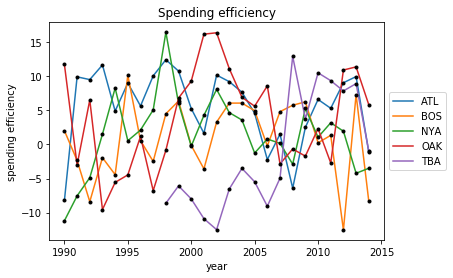

In [9]:
temp = expected_win[['yearID','teamID','win_percent','expected_win']].copy()
temp['spending_efficiency'] = temp['win_percent'] - temp['expected_win']
spending_efficiency_table = temp.loc[temp['teamID'].isin(['OAK','BOS','NYA','ATL','TBA'])]\
.sort_values(['yearID','teamID'],ascending=[True,True])

for team, group in spending_efficiency_table.groupby(['teamID']):
    plt.plot(group['yearID'].values,group['spending_efficiency'].values,label=team)
    plt.legend(loc='center left',bbox_to_anchor=(1.0,0.5))
plt.plot(spending_efficiency_table['yearID'].values, spending_efficiency_table['spending_efficiency'].values ,'.', c = 'black')
plt.xlabel("year")
plt.ylabel("spending efficiency")
plt.title("Spending efficiency")
plt.show()

Question 4
All teams have a positive spending efficiency at most time. 
OAK did a good job in the period of 2000-2004 as I claimed before
I didn't observed some sudden changes of spending efficiency, for example NYA's change in 1995-2000